In [1]:
import os
work_dir = os.sep.join(os.getcwd().split(os.sep)[0:-1])

In [2]:
print(work_dir)

/Users/matthewlee/Documents/Code/b24/b5/bot2405a/dbc24/web/net/n5


In [3]:
import sys

work_tool=os.path.join(work_dir,'action')
data_dir_netflix=os.path.join(work_dir,'setup/d_data')
data_dir_edgar=os.path.join(os.sep.join(work_dir.split(os.sep)[0:-3]),'dat/net/sec_edgar')

sys.path.insert(0, work_tool)

In [4]:
from polyfuzz1 import polyfuzz1, metrics
from polyfuzz1.models import tfidf

import json
import numpy as np
import pandas as pd

## Data

In [5]:
# Load data
# data_a = json.load(open(f'{data_dir_netflix}/movie_titles_netflix_a.json', 'r'))
# data_b = json.load(open(f'{data_dir_netflix}/movie_titles_netflix_b.json', 'r'))

data_a = pd.read_csv(f'{data_dir_edgar}/edgar100a.csv')
data_b = pd.read_csv(f'{data_dir_edgar}/edgar100b.csv')

In [6]:
to_list = data_a.loc[:, 'name'].tolist()
from_list = data_b.loc[:, 'name'].tolist()

## Custom Model/Grouping

In [7]:
class MyModel(BaseMatcher):
    def match(self, from_list, to_list, **kwargs):
        # Calculate distances
        matches = [[fuzz.ratio(from_string, to_string) / 100 
                   for to_string in to_list] for from_string in from_list]

        # Get best matches
        mappings = [to_list[index] for index in np.argmax(matches, axis=1)]
        scores = np.max(matches, axis=1)

        # Prepare dataframe
        matches = pd.DataFrame({'From': from_list,
                                'To': mappings, 
                                'Similarity': scores})
        return matches

NameError: name 'BaseMatcher' is not defined

In [ ]:
# from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
# to_list = ["apple", "apples", "mouse"]

# model = PolyFuzz("TF-IDF").match(from_list, to_list)

# Custom grouper
base_edit_grouper = EditDistance(n_jobs=1)
# model.group(base_edit_grouper)

## Edit Distance

In [ ]:
model = polyfuzz1.PolyFuzz1("EditDistance").match(to_list, from_list)

In [ ]:
model.matches['EditDistance']

## TF-IDF

In [8]:
model = polyfuzz1.PolyFuzz1("TF-IDF").match(to_list, from_list)
matches = model.matches['TF-IDF']

In [9]:
grouper = tfidf.TFIDF()
model.group(grouper)

In [10]:
model.matches['TF-IDF']

,From,To,Similarity,Group
0,!J INC,1-800 IDEAS COM INC,0.271,1-800 IDEAS COM INC
1,"#1 A LIFESAFER HOLDINGS, INC.","1-800 ALL PARTS HOLDINGS, INC.",0.401,"1-800 ALL PARTS HOLDINGS, INC."
2,#1 ARIZONA DISCOUNT PROPERTIES LLC,1 ZONE LTD,0.163,1 ZONE LTD
3,#1 PAINTBALL CORP,1 CLASS CORP,0.216,1 CLASS CORP
4,$ LLC,1 RATE COM LLC,0.168,1 RATE COM LLC
...,...,...,...,...
95,0741693 B.C. LTD.,1 ZONE LTD,0.115,1 ZONE LTD
96,0761717 B.C. LTD.,"0967761 BC, LTD.",0.237,"0967761 BC, LTD."
97,0766284 B.C. LTD,1 ZONE LTD,0.116,1 ZONE LTD
98,0787251 BC LTD,0893787 B.C. LTD.,0.240,0893787 B.C. LTD.


In [ ]:
# model.method._extract_tf_idf(to_list, from_list)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_a)
vectorizer.get_feature_names_out()[25:75]

array([], dtype=object)

In [14]:
vectorizer = CountVectorizer(min_df=1, analyzer=model.method._create_ngrams).fit(to_list + from_list)
tf_idf_to = vectorizer.transform(to_list)
tf_idf_from = vectorizer.transform(from_list)

In [ ]:
print(np.array(tf_idf_to))

In [16]:
pd.DataFrame(metrics.precision_recall_curve(matches))

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.00000,0.01000,0.02000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
1,1.00000,1.00000,1.00000,0.990000,0.990000,0.990000,0.990000,0.970000,0.950000,0.920000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0.20972,0.20972,0.20972,0.211556,0.211556,0.211556,0.211556,0.214577,0.217474,0.221707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


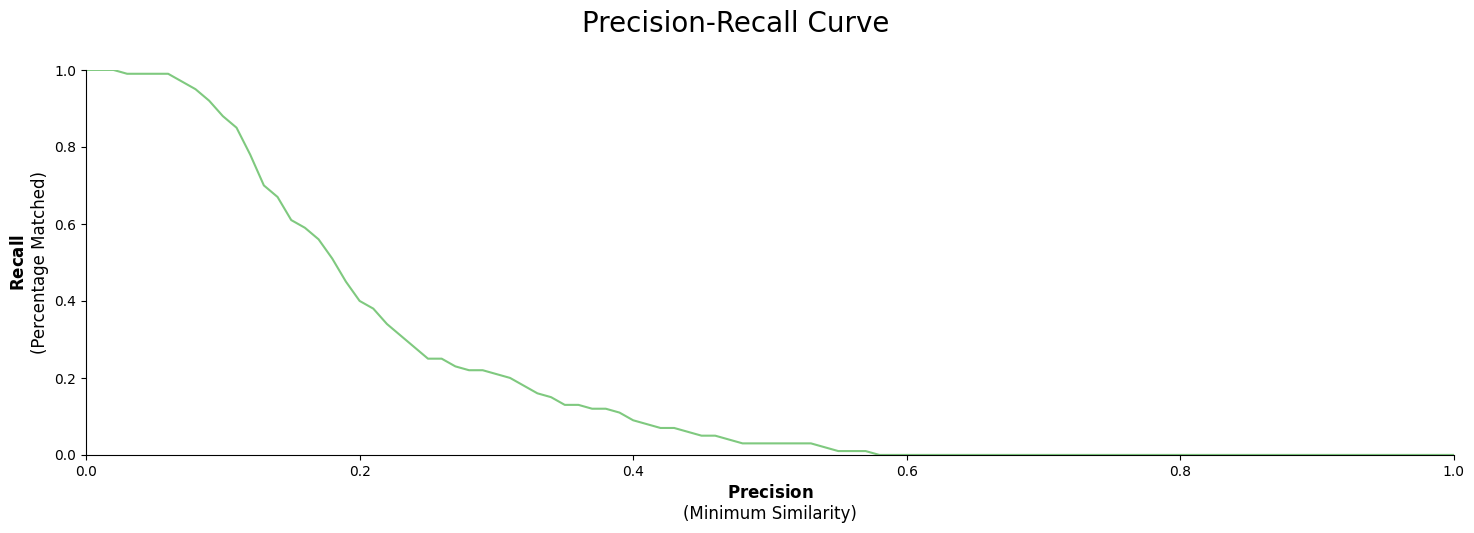

In [17]:
model.visualize_precision_recall()

In [18]:
model_a_to_b = polyfuzz1.Polyfuzz1

AttributeError: module 'polyfuzz1.polyfuzz1' has no attribute 'Polyfuzz1'